In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
df = pd.read_csv('sales_data.csv')

In [176]:
df.head()

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,...,Sales_Channel,Region_and_Sales_Rep,Month,Revenue,Total_Cost,Profit,Net_Profit,month,Profit_Margin,Sales_Target
0,1052,2023-03-02,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,...,Online,North-Bob,Mar,4809.96,2749.50,2060.46,2055.911427,2023-03,42.742797,6065.0
5,1021,2023-11-02,Charlie,West,3761.15,32,Food,900.79,1106.51,New,...,Online,West-Charlie,Nov,35408.32,28825.28,6583.04,6575.141585,2023-11,18.569482,4513.0
6,1083,2023-11-04,Bob,West,618.31,29,Furniture,2408.81,2624.09,Returning,...,Online,West-Bob,Nov,76098.61,69855.49,6243.12,6242.254366,2023-11,8.202849,742.0
7,1087,2023-06-01,Eve,South,7698.92,46,Furniture,3702.51,3964.65,New,...,Online,South-Eve,Jun,182373.90,170315.46,12058.44,12049.201296,2023-06,6.606867,9239.0
9,1075,2023-09-10,Charlie,West,8239.58,18,Clothing,2228.35,2682.34,New,...,Online,West-Charlie,Sep,48282.12,40110.30,8171.82,8161.108546,2023-09,16.902962,9887.0


In [119]:
df.shape

(1000, 14)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product_ID            1000 non-null   int64  
 1   Sale_Date             1000 non-null   object 
 2   Sales_Rep             1000 non-null   object 
 3   Region                1000 non-null   object 
 4   Sales_Amount          1000 non-null   float64
 5   Quantity_Sold         1000 non-null   int64  
 6   Product_Category      1000 non-null   object 
 7   Unit_Cost             1000 non-null   float64
 8   Unit_Price            1000 non-null   float64
 9   Customer_Type         1000 non-null   object 
 10  Discount              1000 non-null   float64
 11  Payment_Method        1000 non-null   object 
 12  Sales_Channel         1000 non-null   object 
 13  Region_and_Sales_Rep  1000 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 109.5+ KB


In [121]:
df = df.dropna(subset=['Sale_Date'])

In [122]:
df.shape

(1000, 14)

In [123]:
df['Sale_Date'] = pd.to_datetime(df['Sale_Date'], errors='coerce')

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Product_ID            1000 non-null   int64         
 1   Sale_Date             379 non-null    datetime64[ns]
 2   Sales_Rep             1000 non-null   object        
 3   Region                1000 non-null   object        
 4   Sales_Amount          1000 non-null   float64       
 5   Quantity_Sold         1000 non-null   int64         
 6   Product_Category      1000 non-null   object        
 7   Unit_Cost             1000 non-null   float64       
 8   Unit_Price            1000 non-null   float64       
 9   Customer_Type         1000 non-null   object        
 10  Discount              1000 non-null   float64       
 11  Payment_Method        1000 non-null   object        
 12  Sales_Channel         1000 non-null   object        
 13  Region_and_Sales_Re

In [125]:
df.duplicated().sum()

0

In [126]:
df.isnull().sum()

Product_ID                0
Sale_Date               621
Sales_Rep                 0
Region                    0
Sales_Amount              0
Quantity_Sold             0
Product_Category          0
Unit_Cost                 0
Unit_Price                0
Customer_Type             0
Discount                  0
Payment_Method            0
Sales_Channel             0
Region_and_Sales_Rep      0
dtype: int64

In [127]:
df = df.dropna(subset=['Sale_Date'])

In [128]:
df.shape

(379, 14)

In [129]:
print(df[df['Sale_Date'].isna()])

Empty DataFrame
Columns: [Product_ID, Sale_Date, Sales_Rep, Region, Sales_Amount, Quantity_Sold, Product_Category, Unit_Cost, Unit_Price, Customer_Type, Discount, Payment_Method, Sales_Channel, Region_and_Sales_Rep]
Index: []


In [130]:
df['Month'] = df['Sale_Date'].dt.month

In [131]:
df['Month'] = df['Sale_Date'].dt.strftime('%b')

In [132]:
df.head()

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep,Month
0,1052,2023-03-02,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob,Mar
5,1021,2023-11-02,Charlie,West,3761.15,32,Food,900.79,1106.51,New,0.21,Cash,Online,West-Charlie,Nov
6,1083,2023-11-04,Bob,West,618.31,29,Furniture,2408.81,2624.09,Returning,0.14,Cash,Online,West-Bob,Nov
7,1087,2023-06-01,Eve,South,7698.92,46,Furniture,3702.51,3964.65,New,0.12,Bank Transfer,Online,South-Eve,Jun
9,1075,2023-09-10,Charlie,West,8239.58,18,Clothing,2228.35,2682.34,New,0.13,Bank Transfer,Online,West-Charlie,Sep


# Sales by Region

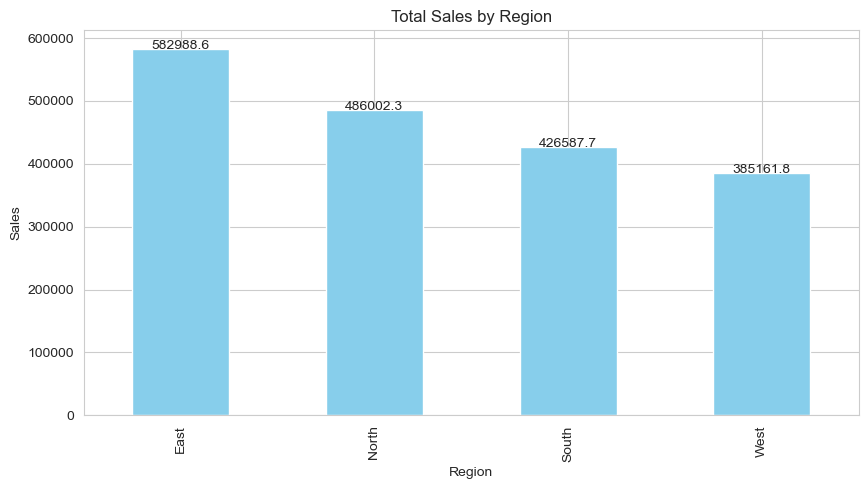

In [133]:
region_sales = df.groupby('Region')['Sales_Amount'].sum().sort_values(ascending=False) 
region_sales.plot(kind='bar', figsize=(10,5), title='Total Sales by Region', color='skyblue') 
plt.ylabel("Sales") 
for index, value in enumerate(region_sales.values):
    plt.text(index, value + 3, round(value, 1), ha='center')
plt.show() 


In [134]:
region_sales

Region
East     582988.58
North    486002.31
South    426587.73
West     385161.76
Name: Sales_Amount, dtype: float64

# Sales Rep Performnace

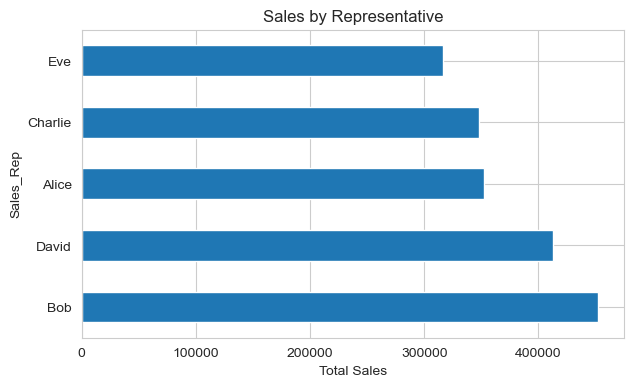

In [135]:
rep_sales = df.groupby('Sales_Rep')['Sales_Amount'].sum().sort_values(ascending=False)

rep_sales.plot(kind='barh', figsize=(7,4), title="Sales by Representative")
plt.xlabel("Total Sales")
plt.show()

In [136]:
rep_sales

Sales_Rep
Bob        452348.74
David      412375.77
Alice      351938.53
Charlie    347565.94
Eve        316511.40
Name: Sales_Amount, dtype: float64

# Sales by Product Category

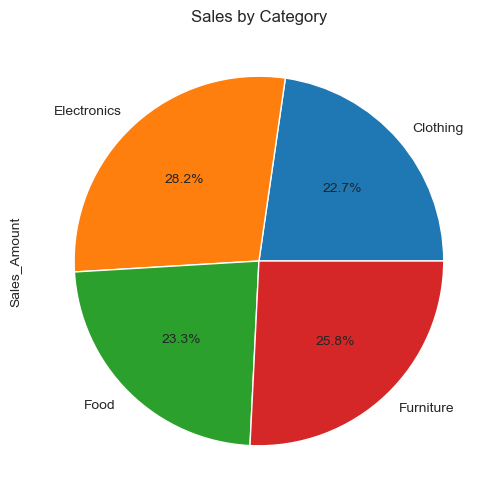

In [137]:
Category_sales = df.groupby('Product_Category')['Sales_Amount'].sum() 
Category_sales.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), title='Sales by Category') 
plt.show() 

# Online vs Retail Sales

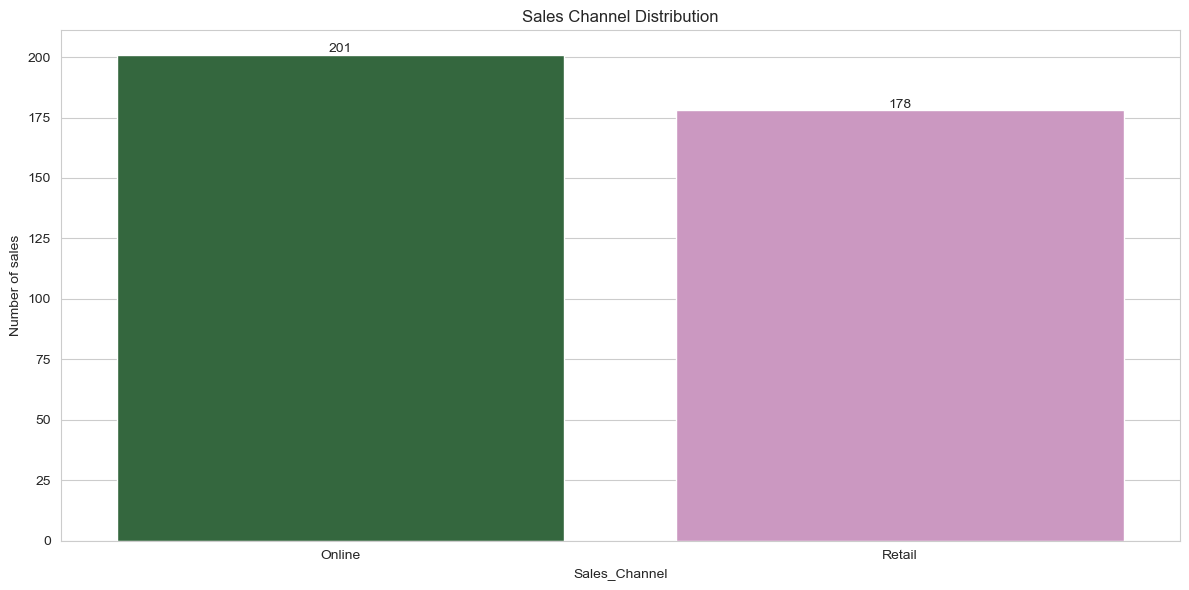

In [138]:

channel_sales = df['Sales_Channel'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(x=channel_sales.index, y=channel_sales.values, palette='cubehelix')
plt.title("Sales Channel Distribution")
plt.ylabel("Number of sales")

#Label on bar
for index, value in enumerate(channel_sales.values):
    plt.text(index, value + 1, round(value, 1), ha='center')
    
plt.tight_layout()
plt.show()

In [139]:
# Add Column Revenue, Total_Cost, Profit, Net_Profit
df['Revenue'] = df['Unit_Price'] * df['Quantity_Sold']
df['Total_Cost'] = df['Unit_Cost'] * df['Quantity_Sold']
df['Profit'] = df['Revenue'] - df['Total_Cost']
df['Net_Profit'] = df['Profit'] - df['Sales_Amount'] * df['Discount'] / 100

# Month Wise - Net Profit

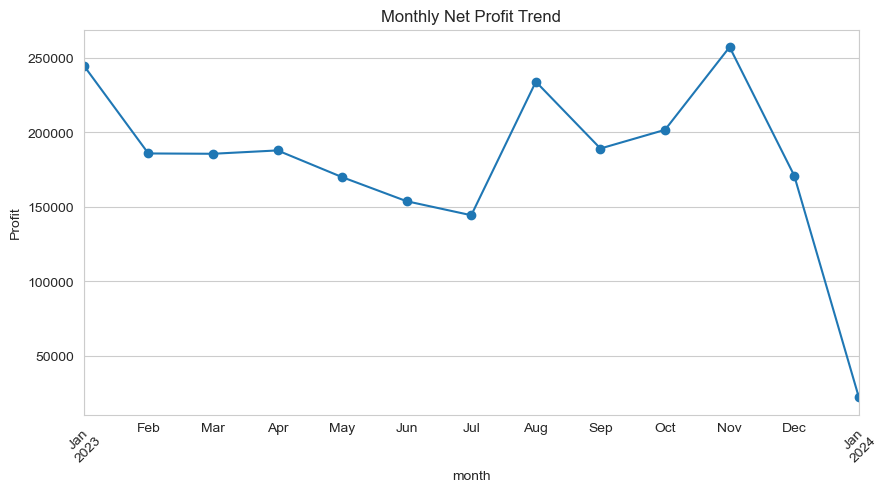

In [177]:
df['month'] = df['Sale_Date'].dt.to_period('M') 
monthly_profit = df.groupby('month')['Net_Profit'].sum() 
monthly_profit.plot(marker='o', figsize=(10,5), title="Monthly Net Profit Trend") 
plt.ylabel("Profit") 
plt.xticks(rotation=45) 
plt.show() 

# Discount vs Profit

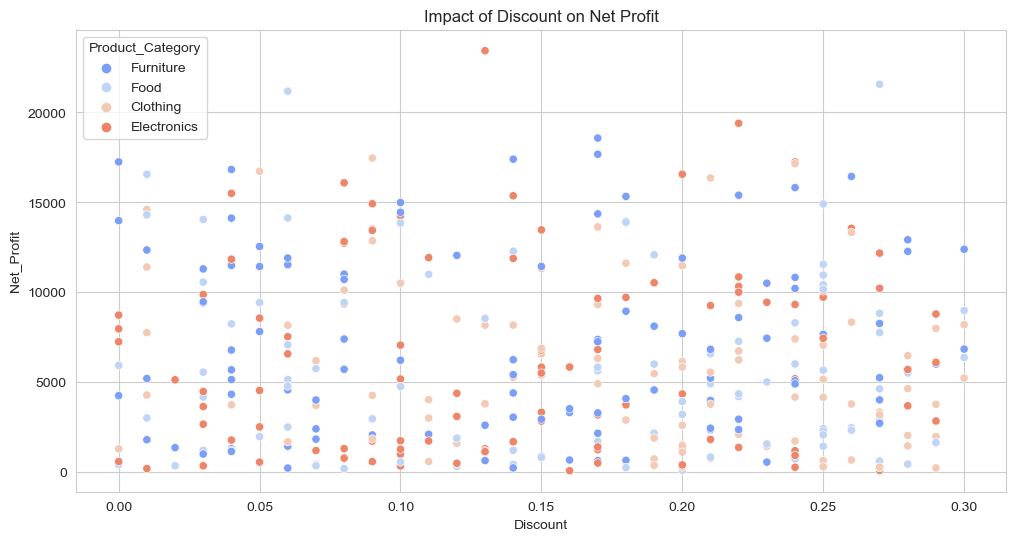

In [141]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x="Discount", y='Net_Profit', hue='Product_Category', palette='coolwarm')
plt.title('Impact of Discount on Net Profit')
plt.xlabel('Discount')
plt.ylabel('Net_Profit')
plt.legend(title='Product_Category')
plt.show()

# Profit Margin by Product Category

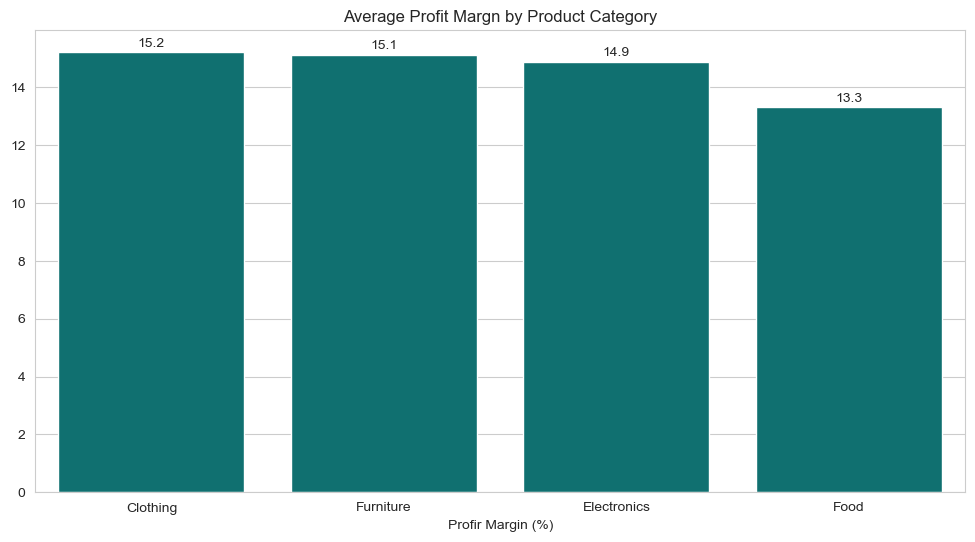

In [142]:
df['Profit_Margin'] = df['Net_Profit'] / df['Revenue'] * 100

category_margin = df.groupby('Product_Category')['Profit_Margin'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=category_margin.index, y=category_margin.values, color='teal')
plt.title('Average Profit Margn by Product Category')

# Label on bar
for index, value in enumerate(category_margin.values):
    plt.text(index, value + 0.2, round(value, 1), ha='center')
plt.xlabel('Profir Margin (%)')
plt.show()

In [143]:
category_margin

Product_Category
Clothing       15.214636
Furniture      15.120740
Electronics    14.874597
Food           13.311032
Name: Profit_Margin, dtype: float64

# Sales Rep Performance by Region

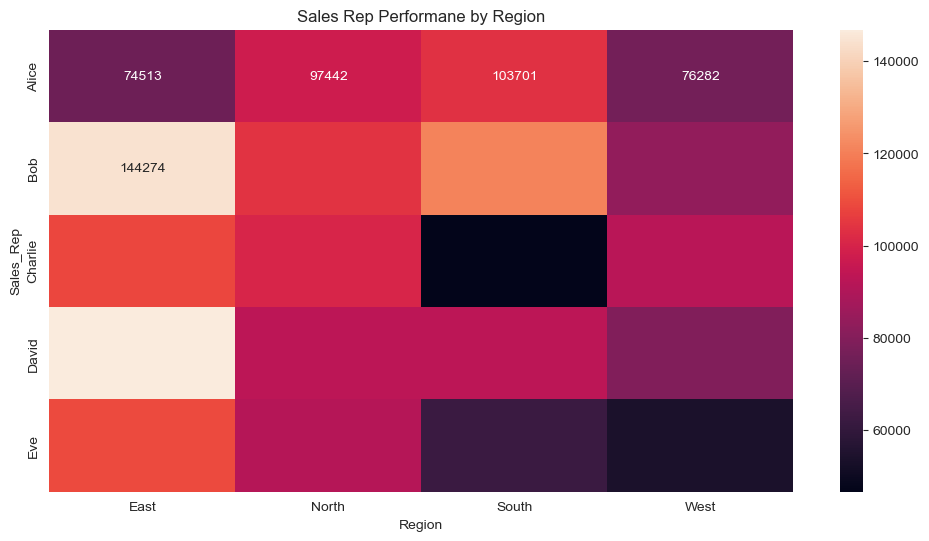

In [144]:
pivot = df.pivot_table(values='Sales_Amount', index='Sales_Rep', columns='Region', aggfunc='sum')
plt.figure(figsize=(12,6))
sns.heatmap(pivot, annot=True, fmt='.0f')
plt.title('Sales Rep Performane by Region')
plt.show()

# Unit Cost vs Unit Price (Pricing Stetergy)

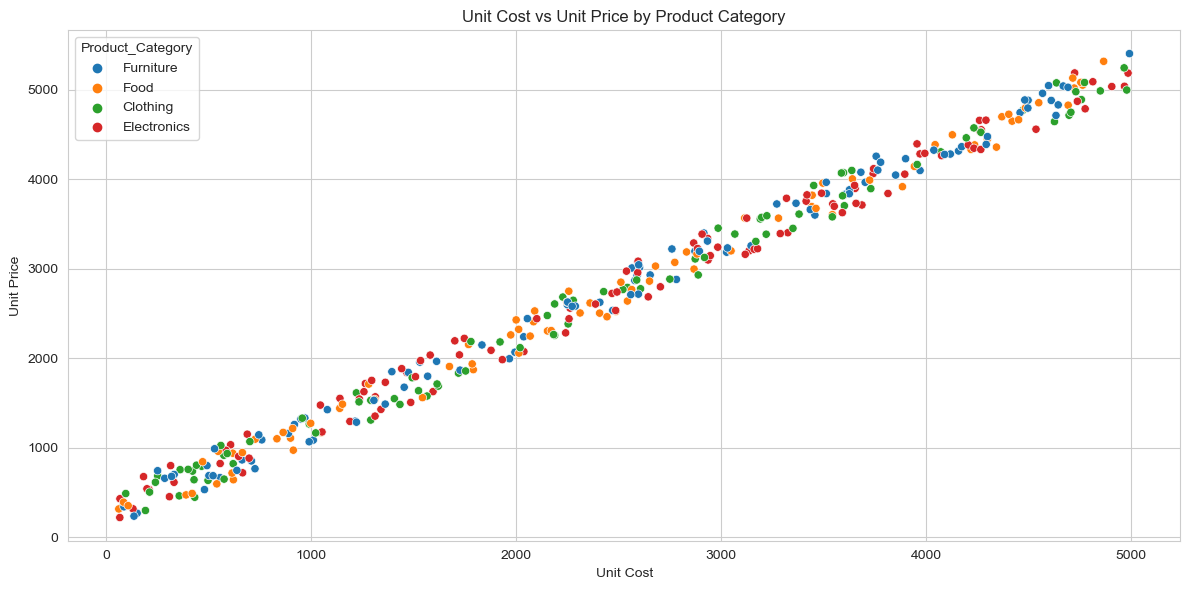

In [145]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='Unit_Cost', y='Unit_Price', hue='Product_Category')
plt.title('Unit Cost vs Unit Price by Product Category')
plt.xlabel('Unit Cost')
plt.ylabel('Unit Price')
plt.tight_layout()
plt.show()

# Profit Margin Distribution by Sales Channel

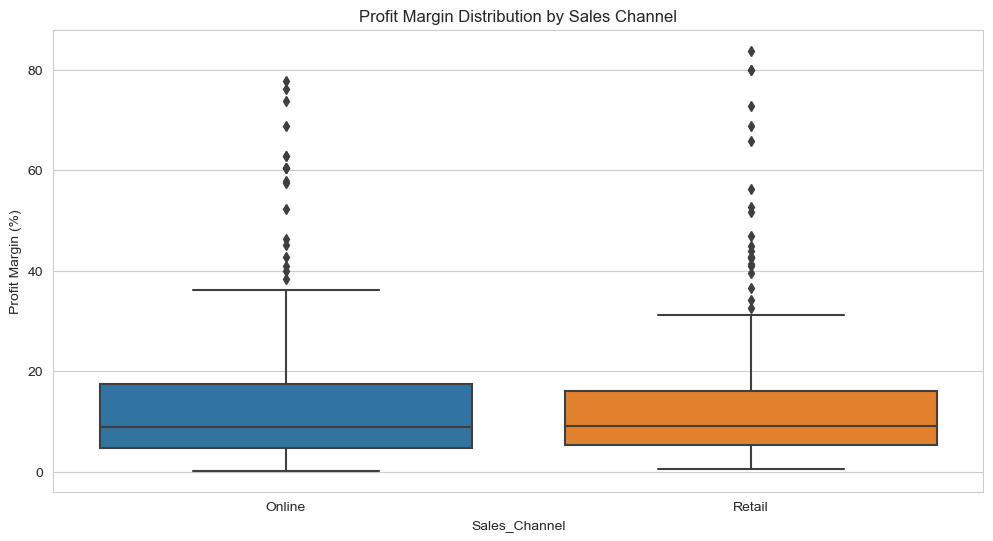

In [178]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Sales_Channel', y='Profit_Margin')
plt.title('Profit Margin Distribution by Sales Channel')
plt.ylabel('Profit Margin (%)')
plt.show()

# Violinplot: Customer Type by Discount

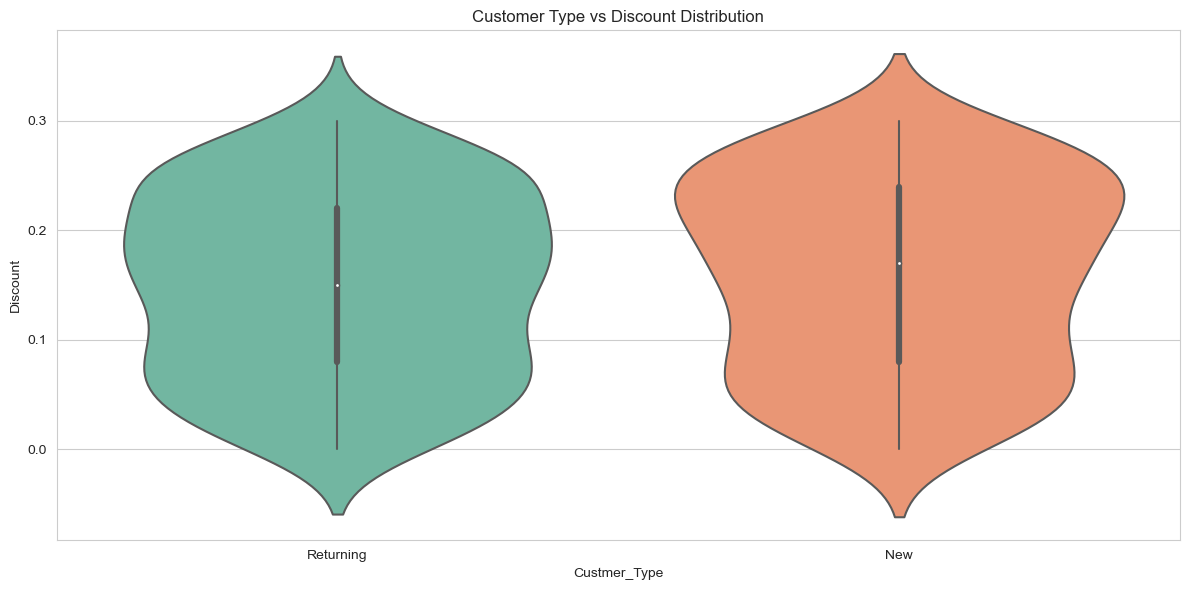

In [179]:
plt.figure(figsize=(12,6))
sns.violinplot(data=df, x='Customer_Type', y='Discount', palette='Set2')
plt.title('Customer Type vs Discount Distribution')
plt.xlabel('Custmer_Type')
plt.tight_layout()
plt.show()

# Top 10 Products by Revenue

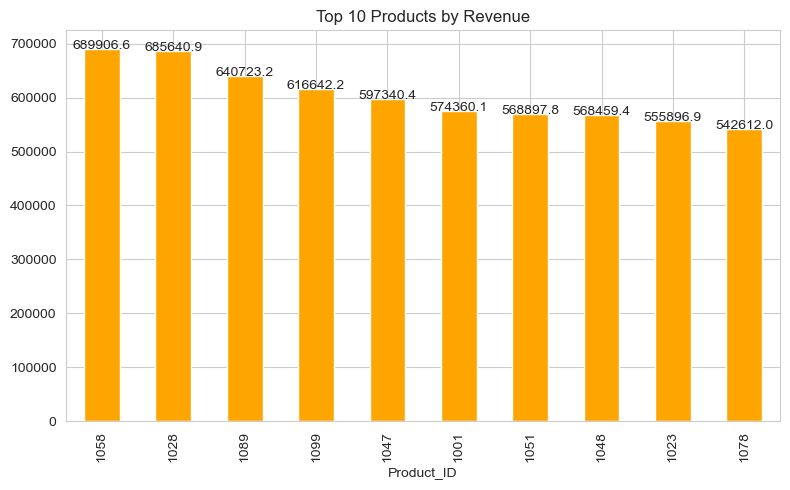

In [180]:
top_products = df.groupby('Product_ID')['Revenue'].sum().sort_values(ascending=False).head(10)

top_products.plot(kind="bar", figsize=(8,5), title="Top 10 Products by Revenue", color='orange')
#Label on bar
for index, value in enumerate(top_products.values):
    plt.text(index, value + 1, round(value, 1), ha='center')

plt.tight_layout()
plt.show()

In [181]:
top_products

Product_ID
1058    689906.63
1028    685640.93
1089    640723.21
1099    616642.22
1047    597340.42
1001    574360.08
1051    568897.75
1048    568459.42
1023    555896.90
1078    542611.95
Name: Revenue, dtype: float64

# Monthly Revenue & Cost Comparison (Stacked Area)

<Figure size 1000x500 with 0 Axes>

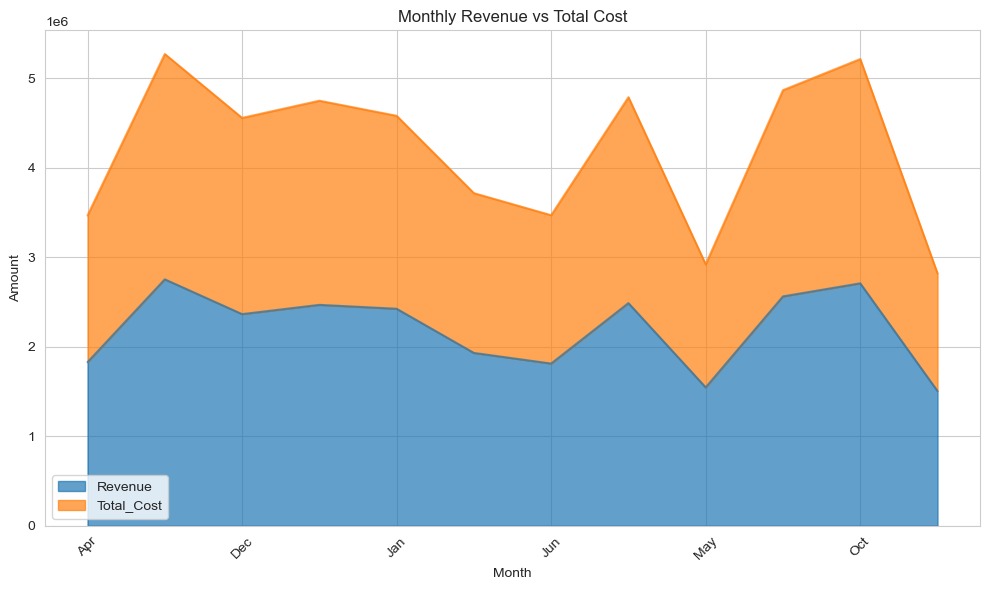

In [150]:
plt.figure(figsize=(10,5))
monthly_data = df.groupby('Month')[['Revenue','Total_Cost']].sum()
monthly_data.plot.area(figsize=(10,6), stacked=True, alpha=0.7)
plt.title('Monthly Revenue vs Total Cost')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top Products by Sales & Profit

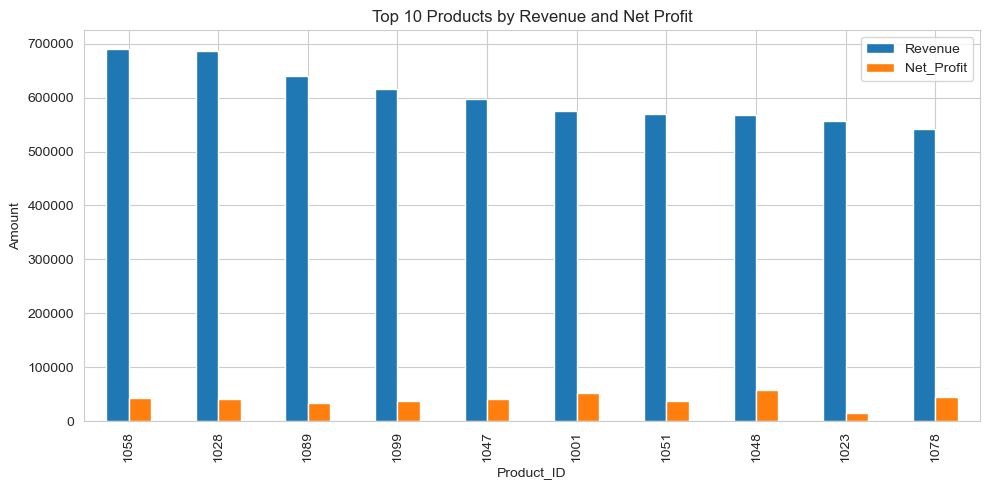

In [151]:
Top_Products = df.groupby('Product_ID')[['Revenue', 'Net_Profit']].sum().sort_values(by="Revenue", ascending=False).head(10)

Top_Products.plot(kind="bar", figsize=(10,5), title='Top 10 Products by Revenue and Net Profit')
plt.ylabel('Amount')
plt.tight_layout()
plt.show()

In [152]:
Top_Products

,Revenue,Net_Profit
Product_ID,,
1058,689906.63,43665.486251
1028,685640.93,42292.324376
1089,640723.21,34920.210827
1099,616642.22,37940.609550
1047,597340.42,42273.596959
1001,574360.08,53353.409383
1051,568897.75,37353.542104
1048,568459.42,58837.313797
1023,555896.90,15847.194637


# Sales Rep - Performance bt Employee

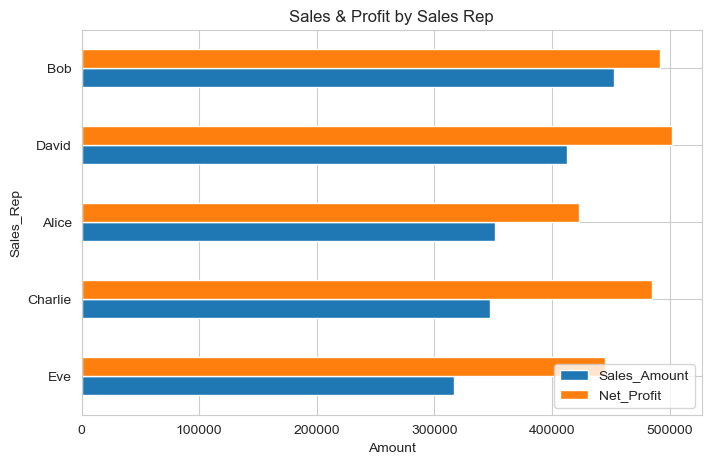

In [153]:
rep_prof = df.groupby('Sales_Rep')[['Sales_Amount','Net_Profit']].sum().sort_values(by='Sales_Amount')
rep_prof.plot(kind='barh', figsize=(8,5), title='Sales & Profit by Sales Rep')
plt.xlabel('Amount')
plt.show()

In [154]:
rep_prof

,Sales_Amount,Net_Profit
Sales_Rep,,
Eve,316511.40,445017.911946
Charlie,347565.94,484897.574284
Alice,351938.53,423313.179927
David,412375.77,502074.423280
Bob,452348.74,492010.731205


# Units Sold vs Profit

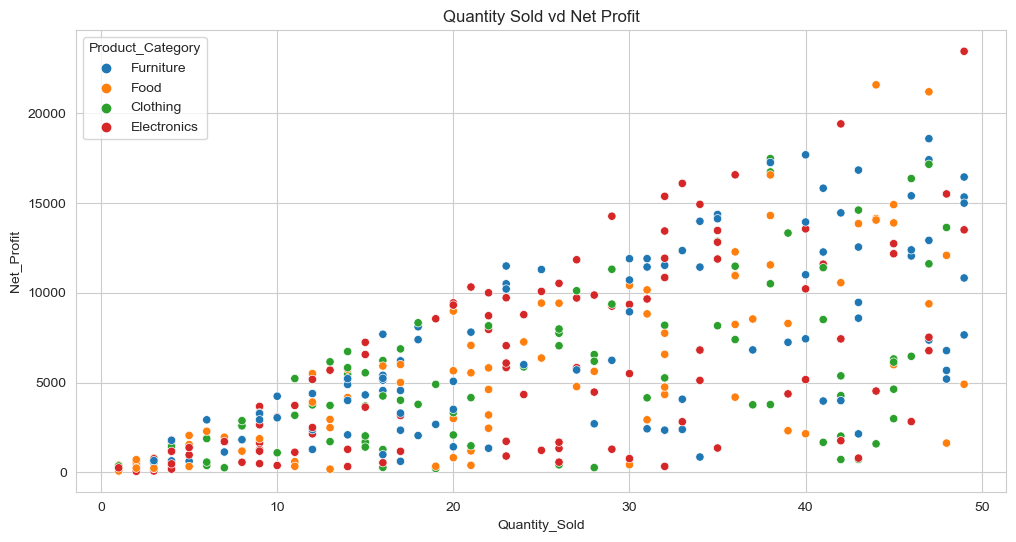

In [155]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='Quantity_Sold', y='Net_Profit', hue='Product_Category')
plt.title("Quantity Sold vd Net Profit")
plt.show()

# Customer Type - Returning vs New

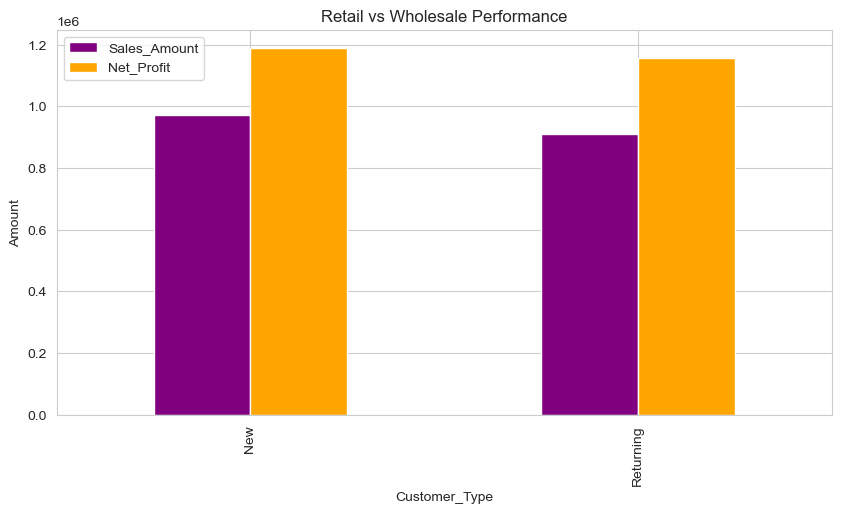

In [156]:
Customer_Performance = df.groupby('Customer_Type')[['Sales_Amount', 'Net_Profit']].sum() 
Customer_Performance.plot(kind='bar', figsize=(10,5), title='Retail vs Wholesale Performance', color=['purple', 'orange']) 
plt.ylabel("Amount")
plt.show() 

In [157]:
Customer_Performance

,Sales_Amount,Net_Profit
Customer_Type,,
New,971170.77,1.188965e+06
Returning,909569.61,1.158349e+06


# Payment Method - Customer Prefernece

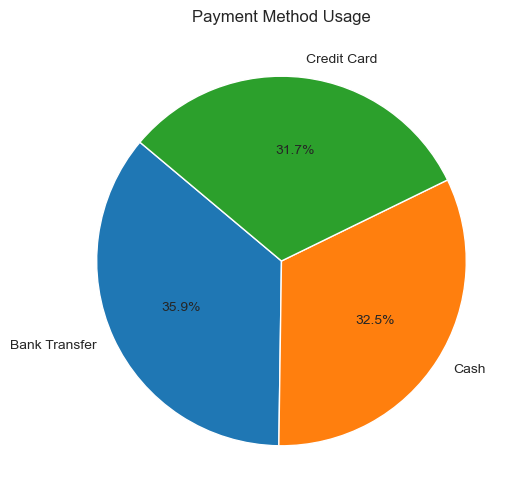

In [158]:
payment_counts = df['Payment_Method'].value_counts()

plt.figure(figsize=(12,6))
plt.pie(payment_counts,labels=payment_counts.index, autopct='%.1f%%', startangle=140)
plt.title('Payment Method Usage')
plt.show()

# Correlation Heatmap (For Numeric Insight)

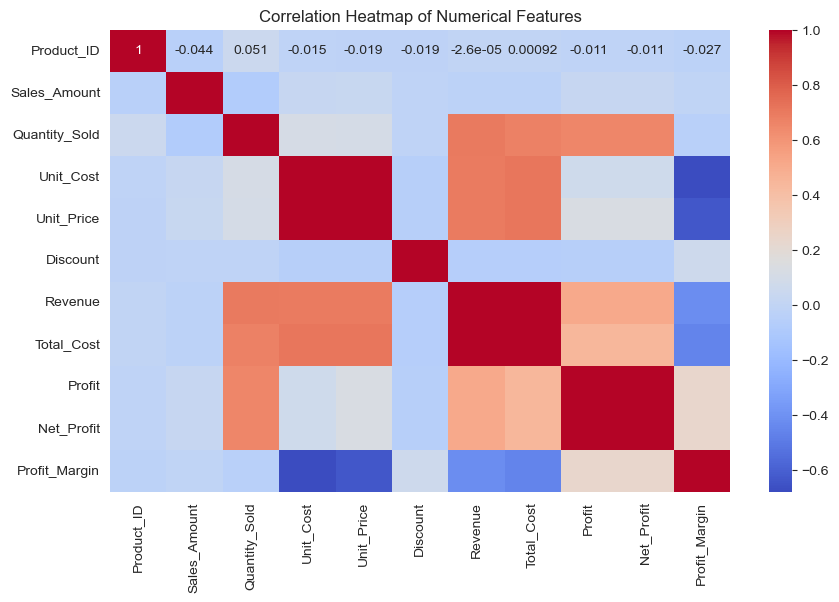

In [159]:
plt.figure(figsize=(10,6)) 
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm') 
plt.title("Correlation Heatmap of Numerical Features") 
plt.show() 


In [160]:
df.head()

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,...,Payment_Method,Sales_Channel,Region_and_Sales_Rep,Month,Revenue,Total_Cost,Profit,Net_Profit,month,Profit_Margin
0,1052,2023-03-02,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,...,Cash,Online,North-Bob,Mar,4809.96,2749.50,2060.46,2055.911427,2023-03,42.742797
5,1021,2023-11-02,Charlie,West,3761.15,32,Food,900.79,1106.51,New,...,Cash,Online,West-Charlie,Nov,35408.32,28825.28,6583.04,6575.141585,2023-11,18.569482
6,1083,2023-11-04,Bob,West,618.31,29,Furniture,2408.81,2624.09,Returning,...,Cash,Online,West-Bob,Nov,76098.61,69855.49,6243.12,6242.254366,2023-11,8.202849
7,1087,2023-06-01,Eve,South,7698.92,46,Furniture,3702.51,3964.65,New,...,Bank Transfer,Online,South-Eve,Jun,182373.90,170315.46,12058.44,12049.201296,2023-06,6.606867
9,1075,2023-09-10,Charlie,West,8239.58,18,Clothing,2228.35,2682.34,New,...,Bank Transfer,Online,West-Charlie,Sep,48282.12,40110.30,8171.82,8161.108546,2023-09,16.902962


# Donut Chart : Region & Product Category Wise Sales Amount

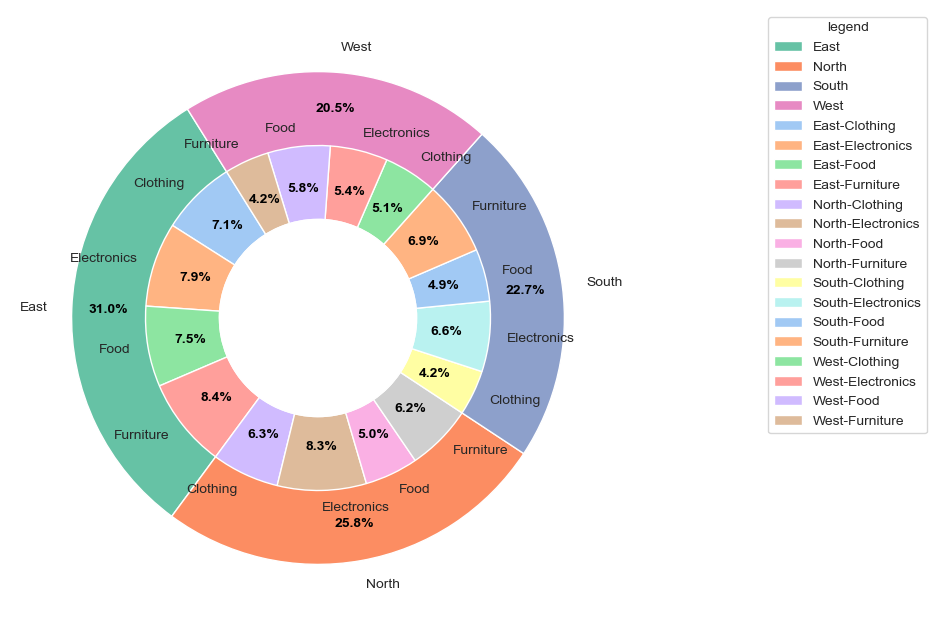

Region  Product_Category
East    Clothing            133426.77
        Electronics         148866.84
        Food                141857.83
        Furniture           158837.14
North   Clothing            118684.82
        Electronics         156767.53
        Food                 93971.20
        Furniture           116578.76
South   Clothing             79867.12
        Electronics         123951.15
        Food                 92285.96
        Furniture           130483.50
West    Clothing             95245.86
        Electronics         101355.18
        Food                109778.89
        Furniture            78781.83
Name: Sales_Amount, dtype: float64

In [161]:
region_group = df.groupby('Region')['Sales_Amount'].sum()
cat_group = df.groupby(['Region', 'Product_Category'])['Sales_Amount'].sum()

re_colors = sns.color_palette('Set2', len(region_group))
cat_colors = sns.color_palette('pastel', len(cat_group))


fig, ax =plt.subplots(figsize=(8,8))
wedges1,texts1, autotexts1= ax.pie(
    region_group,
    labels=region_group.index,
    radius=1,
    colors=re_colors,
    startangle=122,
    autopct=lambda pct: f"{pct:.1f}%",
    pctdistance=0.85,
    wedgeprops=dict(width=0.4, edgecolor='w')
)

wedges2,texts2, autotexts2 = ax.pie(
    cat_group,
    labels=[f"{i[1]}" for i in cat_group.index],
    radius=0.7,
    colors=cat_colors,
    startangle=122,
    autopct=lambda pct: f"{pct:.1f}%",
    pctdistance=0.75,
    wedgeprops=dict(width=0.3, edgecolor='white')
)

for t in autotexts1 + autotexts2:
    t.set_color('black')
    t.set_fontweight('bold')
center_circle = plt.Circle((0,0),0.4, fc='white')
fig.gca().add_artist(center_circle)
ax.legend(
    wedges1 + wedges2,
    list(region_group.index) + [f"{r}-{c}" for r,c in  cat_group.index],
    title='legend',
    bbox_to_anchor=(1, 0, 0.5, 1)
    )

plt.show()

region_group
cat_group

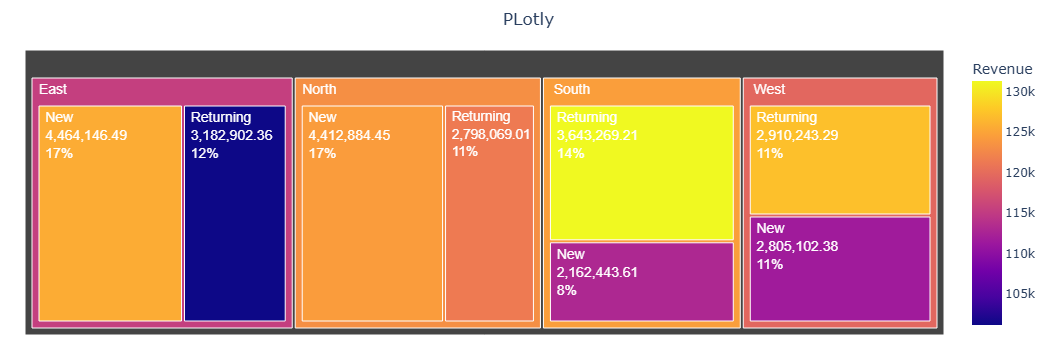

In [162]:
import plotly.express as px


fig = px.treemap(
    df,
    path=['Region', 'Customer_Type'],
    values='Revenue',
    color='Revenue',
    hover_data={'Net_Profit':True, 'Revenue':True, 'Profit':True}
)
fig.update_traces(textinfo='label+value+percent entry', textfont=dict(size=14, family='Arial', color='white'))
fig.update_layout(title='PLotly</b>', title_x=0.5, margin=dict(t=50, l=25, r=25, b=25),
                 paper_bgcolor='white',
                 plot_bgcolor='white')
fig.show()

In [163]:
lab = df.groupby(['Region', 'Customer_Type'])['Revenue'].sum()
lab

Region  Customer_Type
East    New              4464146.49
        Returning        3182902.36
North   New              4412884.45
        Returning        2798069.01
South   New              2162443.61
        Returning        3643269.21
West    New              2805102.38
        Returning        2910243.29
Name: Revenue, dtype: float64

# Cards: Total Sales, Total Revenue, Avg Cost, Avg Price

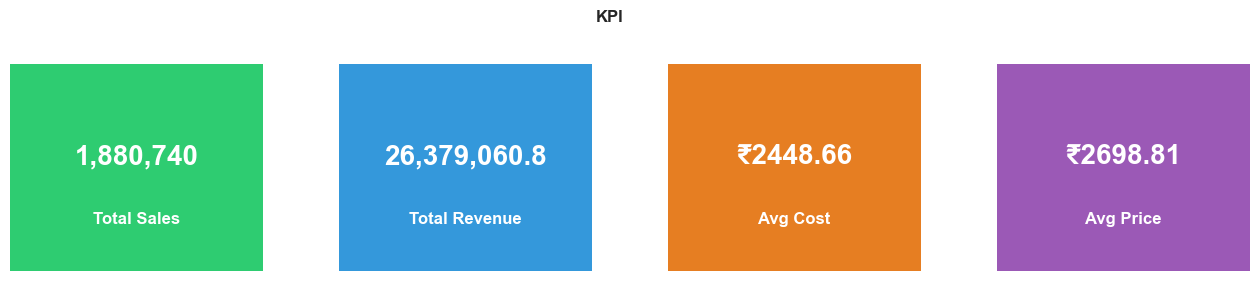

In [164]:
total_sales = df['Sales_Amount'].sum()
total_revenue = df['Revenue'].sum()
avg_cost = round(df['Unit_Cost'].mean(),2)
avg_price = round(df['Unit_Price'].mean(),2)

kpi_titles = ['Total Sales', 'Total Revenue', 'Avg Cost', 'Avg Price']
kpis = [
    f"{total_sales:,.0f}",
    f"{total_revenue:,}",
    f"\u20B9{avg_cost}",
    f"\u20B9{avg_price}"]

sns.set_style('white')
fig, axes = plt.subplots(1, 4, figsize=(16,3))
colors=['#2ecc71','#3498db','#e67e22','#9b59b6']

for ax ,title, value, color in zip (axes, kpi_titles, kpis,colors):
    ax.set_facecolor(color)
    ax.text(0.5, 0.55, value, ha='center', va='center',
           fontsize=20, color='white', fontweight='bold')
    ax.text(0.5, 0.25, title, ha='center', va='center',
           fontsize=12, color='white', fontweight='bold')
    ax.set_xticks([])
    ax.set_yticks([])
    for spine in ax.spines.values():
        spine.set_visible(False)

plt.suptitle('KPI', fontsize=12, fontweight='bold')
plt.subplots_adjust(top=0.8, wspace=0.3)
plt.show()

# Cards: Total, Revenue, Profit, Net Profit, Profit Margin

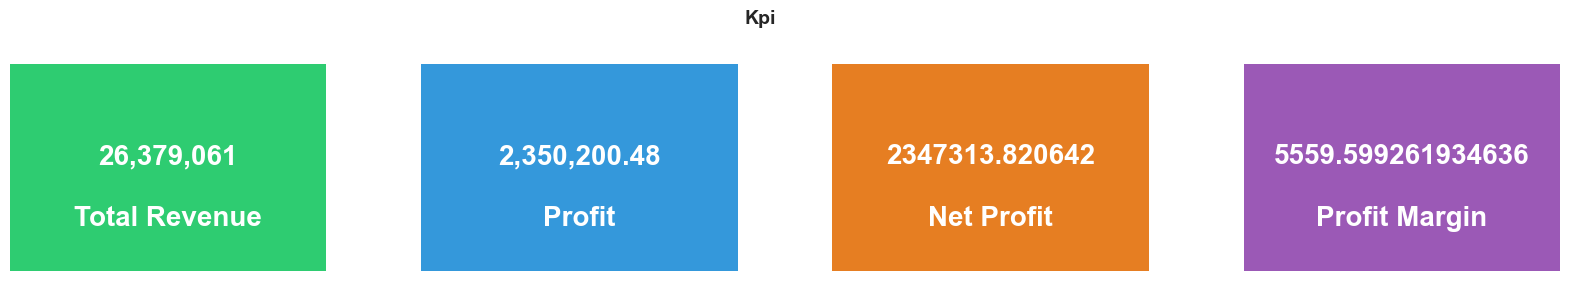

In [165]:
total_revenue = df['Revenue'].sum()
profit = df['Profit'].sum()
net_profit = df['Net_Profit'].sum()
profit_margin = df['Profit_Margin'].sum()
total_cost = df['Total_Cost'].sum()

kpis_title = ['Total Revenue', 'Profit', 'Net Profit', 'Profit Margin', 'Total Cost']
kpis = [
    f"{total_revenue:,.0f}",
    f"{profit:,}",
    f"{net_profit}",
    f"{profit_margin}",
    f"{total_cost}" ]
sns.set_style('white')
fig, axes = plt.subplots(1, 4, figsize=(20,3))
colors=['#2ecc71','#3498db','#e67e22','#9b59b6']

for ax, title, value, color in zip(axes, kpis_title, kpis, colors):
    ax.set_facecolor(color)
    ax.text(0.5, 0.55, value, ha='center', va='center', fontsize=20, color='white', fontweight='bold')
    ax.text(0.5, 0.25, title, ha='center', va='center', fontsize=20, color='white', fontweight='bold')
    ax.set_xticks([])
    ax.set_yticks([])
    for spine in ax.spines.values():
        spine.set_visible(False)

plt.suptitle('Kpi', fontsize=14, fontweight='bold')
plt.subplots_adjust(top=0.8, wspace=0.3)
plt.show()

In [166]:
rev = df['Revenue'].sum()
rev

26379060.8

In [167]:
pro = df['Profit'].sum()
pro

2350200.48

In [168]:
net = df['Net_Profit'].sum()
net

2347313.820642

In [169]:
mar = df['Profit_Margin'].sum()
mar

5559.599261934636

# Water Fall Chart: Region by Revenue in change & cumulative

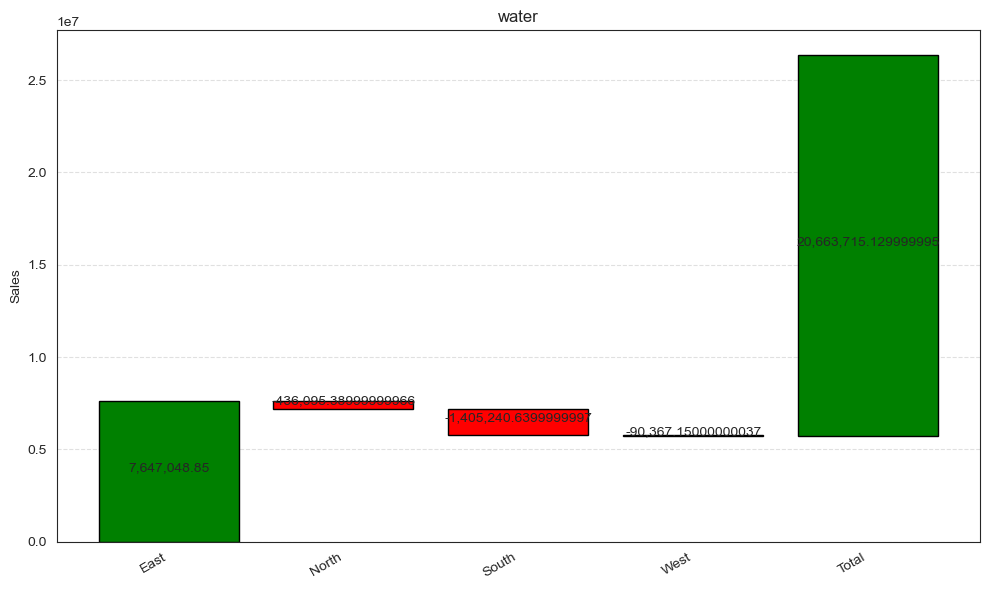

,Region,Revenue,Change,Cumulative
0,East,7647048.85,7647048.85,7647048.85
1,North,7210953.46,-436095.39,14858002.31
2,South,5805712.82,-1405240.64,20663715.13
3,West,5715345.67,-90367.15,26379060.80
4,Total,26379060.80,20663715.13,52758121.60


In [170]:

#water fal

group_b = df.groupby('Region')['Revenue'].sum().reset_index()
total = pd.DataFrame({'Region':['Total'], 'Revenue':[group_b['Revenue'].sum()]})
group_b = pd.concat([group_b, total], ignore_index=True)

group_b['Change'] = group_b['Revenue'].diff().fillna(group_b['Revenue'])
group_b['Cumulative'] = group_b['Revenue'].cumsum()

plt.figure(figsize=(10,6))
bottom = 0
for i, row in group_b.iterrows():
    color='green' if row['Change'] >= 0 else 'red'
    plt.bar(row['Region'], row['Change'], bottom=bottom, color=color, edgecolor='black')
    bottom += row['Change']
    plt.text(i, bottom - (row['Change']/2), f"{row['Change']:,}", ha='center', fontsize=10)
    
plt.title('water')
plt.ylabel('Sales')
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
group_b

# Water fall chart: Product Category by Sales Amount

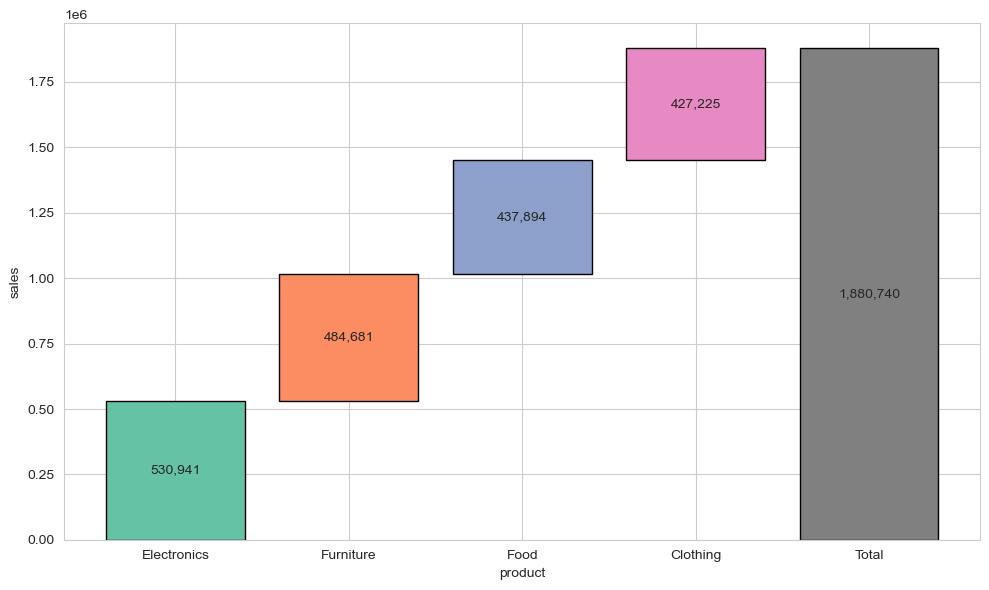

,Product_Category,Sales_Amount
0,Electronics,530940.70
1,Furniture,484681.23
2,Food,437893.88
3,Clothing,427224.57


In [182]:

#waterfall chart
import plotly.graph_objects as go
group_c = df.groupby('Product_Category')['Sales_Amount'].sum().reset_index()
group_c = group_c.sort_values('Sales_Amount', ascending=False).reset_index(drop=True)
values = group_c['Sales_Amount'].values
categories = group_c['Product_Category'].values

cumulative = np.cumsum(values) - values
final_total = values.sum()
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10,6))

for i, (cat, val, start) in enumerate(zip(categories, values, cumulative)):
    ax.bar(cat, val, bottom=start, color=sns.color_palette('Set2')[i], edgecolor='black')
    ax.text(i, start + val/2, f"{val:,.0f}", ha='center', va='center', fontsize=10)

ax.bar('Total', final_total, color='grey', edgecolor='black')
ax.text(len(categories), final_total/2, f"{final_total:,.0f}", ha='center', va='center', fontsize=10)

ax.set_ylabel('sales')
ax.set_xlabel('product')
plt.tight_layout()
plt.show()
group_c

# Waterfall Chart: Revenue & Profit by Product Category

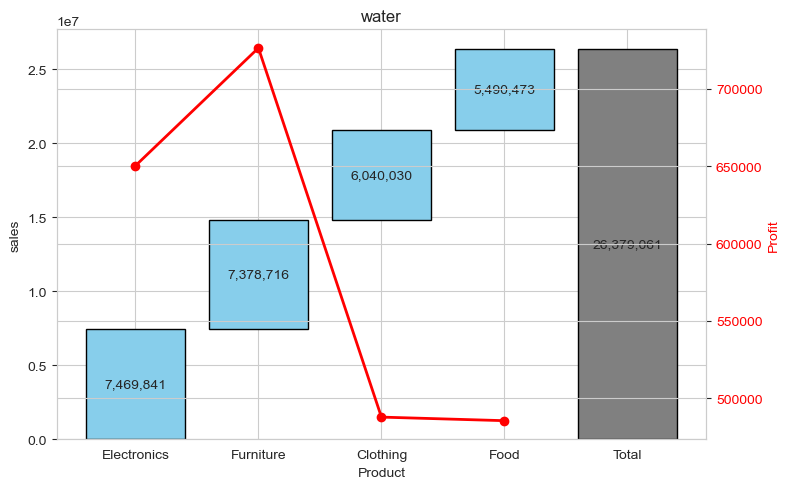

,Product_Category,Revenue,Profit
0,Electronics,7469840.92,650302.46
1,Furniture,7378716.27,726443.83
2,Clothing,6040030.13,487881.46
3,Food,5490473.48,485572.73


In [172]:
#water fall chart baki
group_e = df.groupby('Product_Category')[['Revenue', 'Profit']].sum().reset_index()
group_e = group_e.sort_values('Revenue', ascending=False).reset_index(drop=True)

values = group_e['Revenue'].values
categories = group_e['Product_Category'].values
cumulative = np.cumsum(values) - values
final_total = values.sum()

fig, ax = plt.subplots(figsize=(8,5))

for i, (cat, val, start) in enumerate(zip(categories, values, cumulative)):
    ax.bar(cat, val, bottom=start, color='skyblue', edgecolor='black')
    ax.text(i, start + val/2, f"{val:,.0f}", ha='center', va='center', fontsize=10)

ax.bar('Total', final_total, color='grey', edgecolor='black')
ax.text(len(categories), final_total/2, f"{final_total:,.0f}", ha='center', va='center', fontsize=10)

ax2 = ax.twinx()
ax2.plot(categories, group_e['Profit'], marker='o', color='red', linewidth=2, label='Profit')
ax2.set_ylabel('Profit', fontsize=10, color='red')
ax2.tick_params(axis='y',labelcolor='red')

ax.set_title('water')
ax.set_ylabel('sales')
ax.set_xlabel('Product')
plt.tight_layout()
plt.show()
group_e

# Water fall Chart: Campare Sales Amt & Profit by Product Category or Calculate Profit Percentage(%)

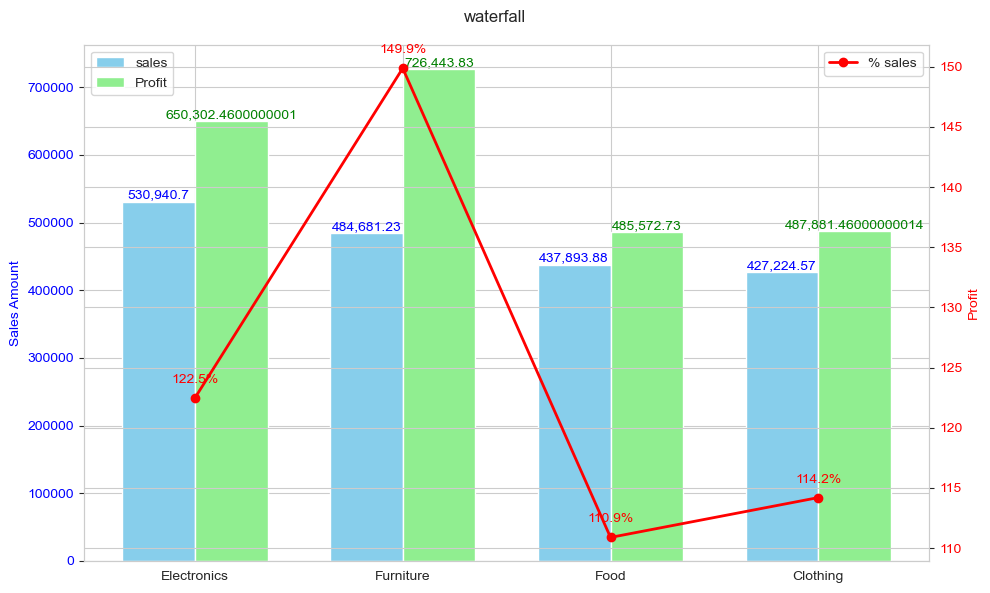

,Product_Category,Sales_Amount,Profit,Profit_Percentage
0,Electronics,530940.70,650302.46,122.481185
1,Furniture,484681.23,726443.83,149.880743
2,Food,437893.88,485572.73,110.888220
3,Clothing,427224.57,487881.46,114.197894


In [173]:
#water fall
group_e = df.groupby('Product_Category').agg({'Sales_Amount':'sum', 'Profit':'sum'}).reset_index()
group_e['Profit_Percentage'] = (group_e['Profit'] / group_e['Sales_Amount']) * 100
group_e = group_e.sort_values('Sales_Amount', ascending=False).reset_index(drop=True)

values = group_e['Sales_Amount'].values
categories = group_e['Product_Category'].values
cum_values = np.cumsum(values)
starts=np.zeros(len(values))
starts[1:]=cum_values[:-1]

fig, ax1 = plt.subplots(figsize=(10,6))
x = np.arange(len(group_e['Product_Category']))
width = 0.35
bars1 = ax1.bar(x - width/2, group_e['Sales_Amount'], width, color='skyblue', label='sales')
bars2 = ax1.bar(x + width/2, group_e['Profit'], width, color='lightgreen', label='Profit')

for bar in bars1:
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height()+100,
             f"{bar.get_height():,}", ha='center', va='bottom', fontsize=10, color='blue')
for bar in bars2:
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height()+50,
             f"{bar.get_height():,}", ha='center', va='bottom', fontsize=10, color='green')
ax1.set_ylabel('Sales Amount', fontsize=10, color='blue')
ax1.set_xticks(x)
ax1.set_xticklabels(group_e['Product_Category']) 
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(x, group_e['Profit_Percentage'],
        marker='o', color='red', linewidth=2, label="% sales")

for i, val in enumerate(group_e['Profit_Percentage']):
    ax2.text(i, val+1, f"{val:.1f}%", ha='center', va='bottom', fontsize=10, color='red')
ax2.set_ylabel('Profit', fontsize=10, color='red')
ax2.tick_params(axis='y',labelcolor='red')
fig.suptitle('waterfall')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()
group_e

In [174]:
df.head()

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,...,Payment_Method,Sales_Channel,Region_and_Sales_Rep,Month,Revenue,Total_Cost,Profit,Net_Profit,month,Profit_Margin
0,1052,2023-03-02,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,...,Cash,Online,North-Bob,Mar,4809.96,2749.50,2060.46,2055.911427,2023-03,42.742797
5,1021,2023-11-02,Charlie,West,3761.15,32,Food,900.79,1106.51,New,...,Cash,Online,West-Charlie,Nov,35408.32,28825.28,6583.04,6575.141585,2023-11,18.569482
6,1083,2023-11-04,Bob,West,618.31,29,Furniture,2408.81,2624.09,Returning,...,Cash,Online,West-Bob,Nov,76098.61,69855.49,6243.12,6242.254366,2023-11,8.202849
7,1087,2023-06-01,Eve,South,7698.92,46,Furniture,3702.51,3964.65,New,...,Bank Transfer,Online,South-Eve,Jun,182373.90,170315.46,12058.44,12049.201296,2023-06,6.606867
9,1075,2023-09-10,Charlie,West,8239.58,18,Clothing,2228.35,2682.34,New,...,Bank Transfer,Online,West-Charlie,Sep,48282.12,40110.30,8171.82,8161.108546,2023-09,16.902962


# Gauge Chart: Region by Sales Amt

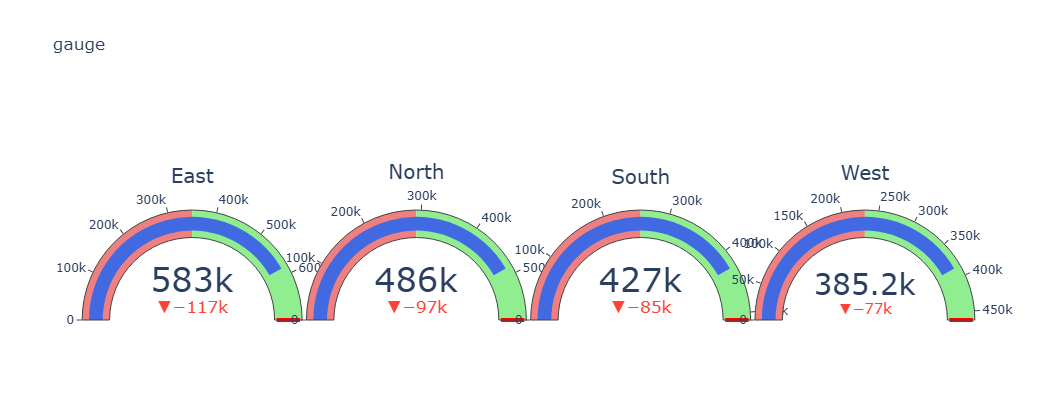

In [175]:
import plotly.graph_objects as go
df['Sales_Target'] = (df['Sales_Amount'] * 1.2).round()

df_group = df.groupby('Region').agg({
    'Sales_Amount':'sum',
    'Sales_Target':'sum',
}).reset_index()

fig = go.Figure()
for i, row in df_group.iterrows():
    achived = row['Sales_Amount']
    target = row['Sales_Target']
    region = row['Region']

    fig.add_trace(go.Indicator(
        mode='gauge+number+delta',
        value=achived,
        delta={'reference':target},
        title={'text':f"{region}"},
        gauge={
          'axis':{'range':[0, target]},
          'bar': {'color':'royalblue'},
          'steps':[
              {'range':[0, target*0.5], 'color':'lightcoral'},
              {'range':[target*0.5, target*0.5], 'color':'lightyellow'},
              {'range':[target*0.5, target], 'color':'lightgreen'},
          ],
            'threshold':{'line':{'color':'red','width':4}, 'value':target}
                        },
        domain={'x': [i*0.25, (i+1)*0.25], 'y': [0, 0.5]}
    ))

fig.update_layout(
    grid={'rows': 1, 'columns': len(df_group), 'pattern':'independent'},
    height=400,
    width=280*len(df_group),
    title='gauge'
)
fig.show()